# ファイルの保存
matplotlibでグラフを作って保存する．

・

┣ file_save.ipynb

┃

┗ hoge

&emsp;┗年-月-日_時-分gauss数字.svg 

In [2]:
import datetime #日時取得
import os #システム操作系
from pathlib import Path #ファイル操作系

import matplotlib as mpl
import matplotlib.pyplot as plt

## 保存先のフォルダの作成

In [3]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, 'hoge')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： D:\lab_gram\DLGI_pytorch\DLGI_1D
保存フォルダ： D:\lab_gram\DLGI_pytorch\DLGI_1D\hoge


保存用ダミーデータの作成(正規分布曲線)

In [4]:
import numpy as np
from scipy.stats import norm
 
# 平均
loc = 0
# 標準偏差
scale = 1
 
# 左端（平均-5*σ）
start = loc - scale * 5
 
# 右端（平均+5*σ）
end = loc + scale * 5
 
# X軸
X = np.arange(start, end, 0.1)
# 正規分布pdf生成
Y = norm.pdf(X, loc=loc, scale=scale)

## 保存用グラフ設定
コピペでOK(多分)

In [5]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 8              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 8         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

## グラフの作成

Text(0, 0.5, 'Y')

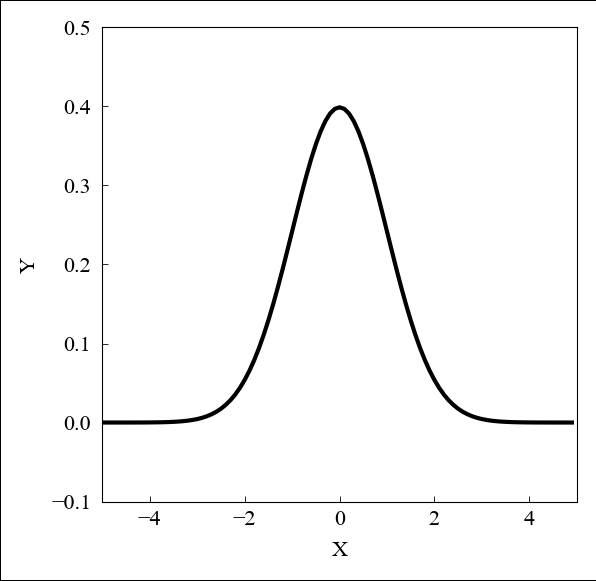

In [6]:
fig = plt.figure(linewidth=0.1) # 空のグラフ作成
ax = fig.add_subplot(111) # グラフエリアの作成
ax.plot(X, Y, c='k') # グラフのプロット cはカラー

# 軸の範囲設定(なくてもいい)
ax.set_xlim(-5, 5)
ax.set_ylim(-0.1, 0.5)

ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする

# 軸ラベル
ax.set_xlabel('X')
ax.set_ylabel('Y')

## グラフの保存

In [7]:
# 現在時刻の取得
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

# 保存ファイル名の作成
aaa = 0
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") + f'gauss{aaa}' # 年-月-日_時-分gauss数字.svg
# f'~~~{変数名}~~~'とすると，変数名のところに代入される

save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

# グラフの保存
fig.savefig(save_file + '.svg', format="svg", bbox_inches="tight")
print('\n保存完了！')

現在時刻： 2021-02-03 19:43:21.074706
保存ファイル名： 2021-02-03_19-43gauss0
保存ファイルパス： D:\lab_gram\DLGI_pytorch\DLGI_1D\hoge\2021-02-03_19-43gauss0

保存完了！


## 軸ラベルの日本語化  
matplotlibのバージョン3.1.0以上  
力技で無理やり表示  
凡例に英字が混入してるやつは諦めてパワポ  
日本語用フォントの名前はホームディレクトリ下の.matplotlib内fontlist-v\**.jsonから探す．(\**はバージョンによる)

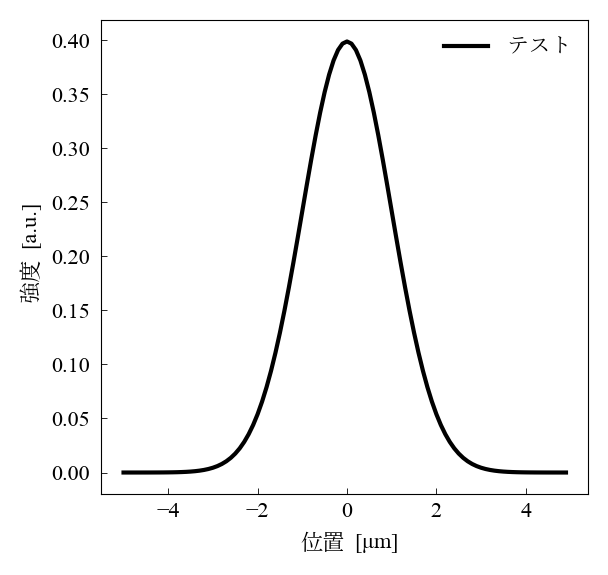

In [15]:
plt.rcParams["mathtext.fontset"] = "stix"  # 数式フォント
plt.rcParams["mathtext.default"] = "default"  # 数式中の文字を立体にする

# 日本語用フォントの設定
fn = 'Yu Mincho'  # windows10
# fn = 'Hiragino Mincho ProN'  # macは多分こっち

x_label = '位置' # x軸のラベル
x_unit = r'[$\mu m$]' # x軸の単位，r文字列にして，$で囲えばtex数式表記が使える

y_label = '強度' # y軸のラベル
y_unit = '[a.u.]' # y軸の単位

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, c='k', label='テスト')

ax.set_xlabel(x_label, fontname=fn, va='top', ha='right') # x軸のラベル，右上基準
ax.xaxis.set_label_coords(0.5, -0.08, transform=ax.transAxes) # x軸のラベル位置調整
fig.text(0.52, -0.08, x_unit, transform=ax.transAxes, va='top', ha='left') # x軸の単位，左上基準
# 数字いじれば位置が調整できる．グラフの左下を(0,0)とした座標系．

ax.set_ylabel(y_label, fontname=fn, va='bottom', ha='right') # y軸のラベル，右上基準
ax.yaxis.set_label_coords(-0.12, 0.5, transform=ax.transAxes) # y軸のラベル位置調整
fig.text(-0.125, 0.52, y_unit, rotation=90, transform=ax.transAxes, va='bottom', ha='right') # y軸の単位，右下基準

ax.legend(prop={"family":fn})

fig.savefig(save_file + '.pdf', format="pdf", bbox_inches="tight")